## **1. Pendahuluan**

Selamat datang pada analisis komprehensif kami untuk **Data Quest Challenge DSI MeetUp 2025**. Dalam *notebook* ini, tim **Cubit Aku Dong** akan memaparkan seluruh proses pengembangan model prediktif, mulai dari pemahaman data hingga generasi prediksi akhir. Fokus utama kami adalah menjawab tantangan yang diajukan, yaitu memprediksi kecenderungan nasabah bank untuk berlangganan produk deposito berjangka.

Proyek pengerjaan kami dapat di akses di repository github berikut:
https://github.com/LatiefDataVisionary/data-quest-challenge-dsi-2025/tree/main

### **1.1. Latar Belakang Masalah**

Dalam dinamika industri perbankan yang kompetitif, kemampuan untuk memahami dan mengantisipasi perilaku nasabah merupakan aset strategis. Salah satu produk finansial yang umum ditawarkan adalah deposito berjangka, yang memberikan tingkat pengembalian tetap dalam periode waktu tertentu. Efektivitas kampanye pemasaran untuk produk ini sangat bergantung pada ketepatan penargetan nasabah. Mengidentifikasi segmen nasabah yang paling responsif tidak hanya meningkatkan tingkat konversi tetapi juga mengoptimalkan alokasi sumber daya pemasaran. Tantangan yang dihadapi adalah bagaimana memanfaatkan data historis nasabah untuk membangun sebuah sistem cerdas yang mampu memprediksi potensi minat mereka terhadap penawaran deposito.

### **1.2. Tujuan Proyek & Metrik Evaluasi (AUC)**

Proyek ini bertujuan untuk mengembangkan sebuah model *machine learning* klasifikasi yang handal dan akurat dengan kapabilitas sebagai berikut:

1.  **Mengklasifikasikan Nasabah**: Model diharapkan mampu membedakan nasabah ke dalam dua kategori utama:
    *   **Kelas 1**: Nasabah yang diprediksi **akan** berlangganan deposito berjangka.
    *   **Kelas 0**: Nasabah yang diprediksi **tidak akan** berlangganan deposito berjangka.
2.  **Mengidentifikasi Faktor Pengaruh**: Secara implisit, melalui analisis fitur, diharapkan dapat tergali faktor-faktor demografis, perilaku, atau interaksi sebelumnya yang signifikan memengaruhi keputusan nasabah.

Kinerja model akan dievaluasi secara kuantitatif menggunakan metrik **Area Under the Receiver Operating Characteristic Curve (AUC)**. AUC merupakan ukuran agregat dari performa model klasifikasi di semua ambang batas klasifikasi yang mungkin. Nilai AUC berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi mengindikasikan kemampuan diskriminasi model yang lebih baik antara kelas positif dan negatif. Dalam konteks ini, model dengan AUC yang tinggi akan lebih efektif dalam mengidentifikasi nasabah yang benar-benar berpotensi berlangganan.

### **1.3. Deskripsi Dataset (Ringkasan dari Guideline)**

Analisis ini akan didasarkan pada dataset yang disediakan oleh panitia kompetisi. Dataset tersebut mencakup informasi historis mengenai nasabah bank, yang terdiri dari berbagai atribut, termasuk:

*   **Informasi Demografis**: Seperti usia, pekerjaan, status perkawinan, dan tingkat pendidikan.
*   **Riwayat Keuangan & Perbankan**: Seperti status gagal bayar sebelumnya, kepemilikan pinjaman rumah atau pribadi.
*   **Detail Interaksi Kampanye**: Seperti jenis kontak, bulan dan hari kontak terakhir, serta jumlah kontak selama kampanye saat ini dan sebelumnya.
*   **Indikator Ekonomi Makro**: Seperti tingkat variasi pekerjaan, indeks harga konsumen, indeks kepercayaan konsumen, dan suku bunga Euribor.
*   **Variabel Target**: Kolom `berlangganan_deposito` yang mengindikasikan apakah nasabah akhirnya berlangganan produk deposito (1 jika ya, 0 jika tidak).

Dataset akan terbagi menjadi dua bagian utama:
1.  **Dataset Pelatihan (Training Set)**: Digunakan untuk melatih dan mengembangkan model prediktif. Dataset ini mencakup fitur-fitur prediktor beserta variabel target.
2.  **Dataset Validasi (Validation Set)**: Digunakan untuk menghasilkan prediksi akhir yang akan disubmit. Dataset ini hanya berisi fitur-fitur prediktor tanpa variabel target.


### **1.4. Alur Kerja Proyek**

Untuk mencapai tujuan yang telah ditetapkan, kami akan mengikuti serangkaian tahapan metodologis yang terstruktur sebagai berikut:

1.  **Persiapan Lingkungan & Pemuatan Data**
    - Mengatur *environment* kerja, mengimpor *library* yang relevan, dan memuat dataset pelatihan serta validasi.
2.  **Eksplorasi Data Awal (Initial EDA)**
    - Melakukan analisis mendalam terhadap dataset untuk memahami karakteristik, distribusi, korelasi antar fitur, serta mengidentifikasi potensi masalah seperti *missing values* atau *outliers*.
3.  **Pra-pemrosesan Data (Data Preprocessing)**
    - Menangani *missing values*, *outliers*, melakukan *encoding* pada fitur kategorikal, dan transformasi fitur numerik agar data siap untuk pemodelan.
4.  **Rekayasa Fitur (Feature Engineering)**
    - Menciptakan fitur-fitur baru yang potensial atau melakukan seleksi fitur untuk meningkatkan performa model.
5.  **Pemodelan (Modeling)**
    - Mengeksplorasi berbagai algoritma klasifikasi, melatih model, dan melakukan evaluasi awal menggunakan teknik validasi silang.
6.  **Penyetelan Hiperparameter (Hyperparameter Tuning)**
    - Mengoptimalkan parameter dari model-model kandidat terbaik untuk mencapai performa maksimal.
7.  **Evaluasi Model Final**
    - Menganalisis performa model terbaik pada data yang relevan dan memastikan robustisitasnya.
8.  **Pembuatan File Submission**
    - Menghasilkan prediksi probabilitas pada dataset validasi menggunakan model final dan menyusunnya sesuai format yang ditentukan.
9.  **Kesimpulan & Refleksi**
    - Merangkum temuan utama, tantangan yang dihadapi, dan potensi pengembangan lebih lanjut.

Setiap tahapan akan didokumentasikan secara detail dalam *notebook* ini untuk memastikan transparansi dan reproduktifitas hasil.

## **2. Persiapan Lingkungan & Import Librar**y

Tahap ini bertujuan untuk mempersiapkan lingkungan kerja serta mengimpor semua pustaka (library) Python yang akan kita gunakan sepanjang proyek ini. Pengaturan konfigurasi awal juga dilakukan di sini untuk memastikan reproduktifitas hasil dan tampilan output yang lebih baik.

### **2.1. Pengaturan Konfigurasi Awal**

Pengaturan ini mencakup penetapan *random seed* untuk konsistensi hasil pada operasi yang melibatkan proses acak, serta konfigurasi tampilan untuk *library* Pandas agar output data lebih mudah dibaca.

In [1]:
import os
import random
import numpy as np
import pandas as pd

# Pengaturan Random Seed untuk Reproduktifitas
RANDOM_STATE = 42

# Pengaturan Opsi Tampilan Pandas
pd.set_option("display.max_columns", None)  # Menampilkan semua kolom DataFrame
pd.set_option("display.max_rows", 100)  # Menampilkan maksimal 100 baris DataFrame
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # Format angka float menjadi 3 desimal
pd.set_option("display.width", 1000)  # Mengatur lebar tampilan output

# Menonaktifkan Peringatan yang Tidak Kritis
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings('ignore', category=DeprecationWarning) # Hati-hati jika menggunakan ini

### **2.2. Import Library yang Dibutuhkan**

Berikut adalah daftar *library* utama yang akan digunakan dalam proyek ini. Kebutuhan *library* mungkin akan bertambah ataupun tidak digunakan seiring dengan pengembangan dan kebutuhan solusi.

*   **Manipulasi Data**: `numpy` dan `pandas`.
*   **Visualisasi Data**: `matplotlib` dan `seaborn`.
*   **Pra-pemrosesan & Pemodelan**: `scikit-learn`.
*   **Model Boosting Lanjutan**: `xgboost`, `lightgbm`, `catboost`.
*   **Penanganan Imbalance**: `imblearn`.

Fungsi ini digunakan untuk membaca file langsung dari Google Drive tanpa harus meng mount Drive terlebih dahulu, asalkan file tersebut diatur untuk bisa dibagikan (shared) dengan mode "Anyone with the link".

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.feature_selection import RFECV, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from smote_variants import SMOTE_ENN, Safe_Level_SMOTE, SMOTE_TomekLinks
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

import sys
import os

from src.model_development import (
    train_and_evaluate_models,
    train_and_evaluate_models_cv,
    is_model_fitted,
    train_model,
    save_model,
)

from src.visualization import plot_multi_histogram, plot_correlation_matrix

## **3. Pemuatan Data (Data Loading)**

### **3.1. Mendefinisikan Path ke Dataset (Training & Validation)**

In [ ]:
def url_converter(url):
    path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]

    return path

In [6]:
train_path = '"https://drive.google.com/file/d/1ypgjcxdI0IMpLA2bQGrI02HaVG9afS0X/view?usp=sharing"'

validation_path = (
    "https://drive.google.com/file/d/1QlOEmXTwpQpCf2F8nA1GdnbTxrXrVRtu/view?usp=sharing"
)

print(f"Path dataset training: {train_path}")
print(f"Path dataset validasi: {validation_path}")

Path dataset training: "https://drive.google.com/file/d/1ypgjcxdI0IMpLA2bQGrI02HaVG9afS0X/view?usp=sharing"
Path dataset validasi: https://drive.google.com/file/d/1QlOEmXTwpQpCf2F8nA1GdnbTxrXrVRtu/view?usp=sharing


### **3.2. Membaca Dataset Training (`df_train`)**

In [7]:
df_train = pd.read_csv(url_converter(train_path))

df_train.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.700,94.215,-40.300,0.885,4991.600,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.100,93.200,-42.000,4.021,5195.800,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.400,93.918,-42.700,4.958,5228.100,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.100,93.994,-36.400,4.859,5191.000,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.400,93.444,-36.100,4.964,5228.100,Bali,0


### **3.3. Membaca Dataset Validasi (`df_val`)**

In [8]:
df_val = pd.read_csv(url_converter(validation_path))

df_val.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.400,93.918,-42.700,4.960,5228.100,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,thu,4,999,0,nonexistent,1.100,93.994,-36.400,4.860,5191.000,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,wed,3,999,0,nonexistent,1.100,93.994,-36.400,4.856,5191.000,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,1,999,1,failure,-1.800,92.893,-46.200,1.327,5099.100,Sumatera


### **3.4. Tinjauan Awal Data (Head, Tail, Shape, Info) untuk Kedua Dataset**

#### **3.4.1. Tinjauan Awal Dataset Training (`df_train`)**

##### **3.4.1.1. Lima baris pertama (head)**

In [9]:
df_train.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.700,94.215,-40.300,0.885,4991.600,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.100,93.200,-42.000,4.021,5195.800,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.400,93.918,-42.700,4.958,5228.100,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.100,93.994,-36.400,4.859,5191.000,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.400,93.444,-36.100,4.964,5228.100,Bali,0


##### **3.4.1.2. Lima baris terakhir (tail)**

In [10]:
df_train.tail()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,2,999,0,nonexistent,1.400,93.444,-36.100,4.967,5228.100,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,2,999,0,nonexistent,-1.100,94.199,-37.500,0.880,4963.600,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.400,93.918,-42.700,4.962,5228.100,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,mon,2,999,0,nonexistent,1.400,94.465,-41.800,4.960,5228.100,NTB,0
22915,977067,49,pekerja kasar,menikah,Tidak Tamat SD,unknown,yes,no,telephone,may,thu,1,999,0,nonexistent,1.100,93.994,-36.400,4.855,5191.000,Papua,0


##### **3.4.1.3. Dimensi dataset (shape)**

In [11]:
print(f"Jumlah baris: {df_train.shape[0]}, Jumlah kolom: {df_train.shape[1]}")

Jumlah baris: 22916, Jumlah kolom: 22


##### **3.4.1.4. Informasi tipe data dan nilai non-null (info):**

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

##### **3.4.1.5. Jumlah nilai unik per kolom (nunique)**

In [13]:
pd.DataFrame(df_train.nunique(), columns=["Jumlah Nilai Unik"])

,Jumlah Nilai Unik
customer_number,22916
usia,78
pekerjaan,12
status_perkawinan,4
pendidikan,8
gagal_bayar_sebelumnya,3
pinjaman_rumah,3
pinjaman_pribadi,3
jenis_kontak,2
bulan_kontak_terakhir,10


##### **3.4.1.6. Menampilkan Semua Nilai Unik untuk Fitur Kategorikal (df_train)**

In [14]:
cat_columns = df_train.select_dtypes(include=["object"]).columns
cat_columns

Index(['pekerjaan', 'status_perkawinan', 'pendidikan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'bulan_kontak_terakhir', 'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya', 'pulau'], dtype='object')

In [15]:
for colum in cat_columns:
    print(f"Unique values column {colum}: {df_train[colum].nunique()}")
    display(df_train[colum].value_counts().to_frame())
    print()

Unique values column pekerjaan: 12


,count
pekerjaan,
sosial media specialis,5755
pekerja kasar,5191
teknisi,3709
penyedia jasa,2195
manajer,1653
pensiunan,968
entrepreneur,815
pemilik bisnis,784
asisten rumah tangga,578



Unique values column status_perkawinan: 4


,count
status_perkawinan,
menikah,13858
lajang,6445
cerai,2566
unknown,47



Unique values column pendidikan: 8


,count
pendidikan,
Pendidikan Tinggi,6699
SMA,5403
SMP,3337
Diploma,2881
Tidak Tamat SD,2284
SD,1308
unknown,992
TIDAK SEKOLAH,12



Unique values column gagal_bayar_sebelumnya: 3


,count
gagal_bayar_sebelumnya,
no,18169
unknown,4745
yes,2



Unique values column pinjaman_rumah: 3


,count
pinjaman_rumah,
yes,12053
no,10284
unknown,579



Unique values column pinjaman_pribadi: 3


,count
pinjaman_pribadi,
no,18888
yes,3449
unknown,579



Unique values column jenis_kontak: 2


,count
jenis_kontak,
cellular,14523
telephone,8393



Unique values column bulan_kontak_terakhir: 10


,count
bulan_kontak_terakhir,
may,7611
jul,4062
aug,3407
jun,2957
nov,2249
apr,1504
oct,421
sep,317
mar,286



Unique values column hari_kontak_terakhir: 5


,count
hari_kontak_terakhir,
thu,4828
mon,4686
wed,4528
tue,4496
fri,4378



Unique values column hasil_kampanye_sebelumnya: 3


,count
hasil_kampanye_sebelumnya,
nonexistent,19836
failure,2313
success,767



Unique values column pulau: 8


,count
pulau,
Jawa,2973
NTT,2933
Sumatera,2910
Bali,2893
NTB,2883
Kalimantan,2814
Sulawesi,2758
Papua,2752


##### **3.4.1.7. Distribusi variabel target 'berlangganan_deposito'**

In [16]:
(
    df_train["berlangganan_deposito"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .astype(str)
    + "%"
)

berlangganan_deposito
0    88.59%
1    11.41%
Name: proportion, dtype: object

#### **3.4.2. Tinjauan Awal Dataset Validasi (`df_val`)**

##### **3.4.2.1. Lima baris pertama (head)**

In [17]:
df_val.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.400,93.918,-42.700,4.960,5228.100,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,thu,4,999,0,nonexistent,1.100,93.994,-36.400,4.860,5191.000,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,wed,3,999,0,nonexistent,1.100,93.994,-36.400,4.856,5191.000,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,1,999,1,failure,-1.800,92.893,-46.200,1.327,5099.100,Sumatera


##### **3.4.2.2. Lima baris terakhir (tail):**

In [18]:
df_val.tail()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,tue,1,999,0,nonexistent,1.400,94.465,-41.800,4.961,5228.100,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,fri,1,999,0,nonexistent,1.100,93.994,-36.400,4.855,5191.000,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,tue,15,999,0,nonexistent,1.400,93.918,-42.700,4.961,5228.100,Papua
5728,986050,46,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,mon,1,999,0,nonexistent,1.400,94.465,-41.800,4.960,5228.100,Sumatera


##### **3.4.2.3. Dimensi dataset (shape)**

In [19]:
print(f"Jumlah baris {df_val.shape[0]}, Jumlah Kolom {df_val.shape[1]}")

Jumlah baris 5729, Jumlah Kolom 21


##### **3.4.2.4. Informasi tipe data dan nilai non-null (info)**

In [20]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               5729 non-null   int64  
 1   usia                          5729 non-null   int64  
 2   pekerjaan                     5729 non-null   object 
 3   status_perkawinan             5729 non-null   object 
 4   pendidikan                    5729 non-null   object 
 5   gagal_bayar_sebelumnya        5729 non-null   object 
 6   pinjaman_rumah                5729 non-null   object 
 7   pinjaman_pribadi              5729 non-null   object 
 8   jenis_kontak                  5729 non-null   object 
 9   bulan_kontak_terakhir         5729 non-null   object 
 10  hari_kontak_terakhir          5729 non-null   object 
 11  jumlah_kontak_kampanye_ini    5729 non-null   int64  
 12  hari_sejak_kontak_sebelumnya  5729 non-null   int64  
 13  jum

##### **3.4.2.5. Jumlah nilai unik per kolom (nunique)**

In [21]:
pd.DataFrame(df_val.nunique(), columns=["Jumlah Nilai Unik"])

,Jumlah Nilai Unik
customer_number,5729
usia,70
pekerjaan,12
status_perkawinan,4
pendidikan,8
gagal_bayar_sebelumnya,2
pinjaman_rumah,3
pinjaman_pribadi,3
jenis_kontak,2
bulan_kontak_terakhir,10


##### **3.4.2.6. Menampilkan Semua Nilai Unik untuk Fitur Kategorikal (df_val)**

In [22]:
if not df_val.empty:
    print("--- Menampilkan Semua Nilai Unik untuk Fitur Kategorikal (df_val) ---")

    # Identifikasi kolom kategorikal
    categorical_cols = df_val.select_dtypes(
        include=["object", "category"]
    ).columns.tolist()

    if categorical_cols:
        for col in categorical_cols:
            print(f"\nNilai Unik untuk Kolom '{col}':")
            unique_values = df_val[col].unique()
            print(unique_values)
            # Anda juga bisa mencetak jumlah nilai unik di sini untuk konteks
            print(f"  (Jumlah nilai unik: {len(unique_values)})")
    else:
        print("Tidak ada fitur kategorikal yang ditemukan di df_val.")
else:
    print("df_val kosong. Tidak dapat menampilkan nilai unik.")

--- Menampilkan Semua Nilai Unik untuk Fitur Kategorikal (df_val) ---

Nilai Unik untuk Kolom 'pekerjaan':
['penyedia jasa' 'teknisi' 'pekerja kasar' 'pengangguran'
 'sosial media specialis' 'pensiunan' 'asisten rumah tangga' 'manajer'
 'mahasiswa' 'entrepreneur' 'pemilik bisnis' 'unknown']
  (Jumlah nilai unik: 12)

Nilai Unik untuk Kolom 'status_perkawinan':
['menikah' 'lajang' 'cerai' 'unknown']
  (Jumlah nilai unik: 4)

Nilai Unik untuk Kolom 'pendidikan':
['SMA' 'Diploma' 'SMP' 'Tidak Tamat SD' 'SD' 'Pendidikan Tinggi' 'unknown'
 'TIDAK SEKOLAH']
  (Jumlah nilai unik: 8)

Nilai Unik untuk Kolom 'gagal_bayar_sebelumnya':
['no' 'unknown']
  (Jumlah nilai unik: 2)

Nilai Unik untuk Kolom 'pinjaman_rumah':
['yes' 'no' 'unknown']
  (Jumlah nilai unik: 3)

Nilai Unik untuk Kolom 'pinjaman_pribadi':
['yes' 'no' 'unknown']
  (Jumlah nilai unik: 3)

Nilai Unik untuk Kolom 'jenis_kontak':
['cellular' 'telephone']
  (Jumlah nilai unik: 2)

Nilai Unik untuk Kolom 'bulan_kontak_terakhir':
['ju

## **4. Eksplorasi Data Awal (EDA) & Pemahaman Data**


Pada bagian ini, kita akan fokus pada dataset training (`df_train`) untuk analisis mendalam, karena dataset ini berisi variabel target yang krusial untuk pemahaman prediktif. Beberapa analisis komparatif dengan dataset validasi (`df_val`) mungkin juga dilakukan untuk memastikan konsistensi distribusi fitur (jika diperlukan dan relevan, namun fokus utama tetap pada `df_train`).


### **4.1. Ringkasan Statistik Deskriptif (`.describe()`) untuk Fitur Numerik**


In [23]:
df_train.describe(percentiles=[0.25, 0.75, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
customer_number,22916.000,550930.993,259909.889,100108.000,325755.000,553139.000,777157.500,955017.000,990610.100,999997.000
usia,22916.000,40.016,10.438,17.000,32.000,38.000,47.000,58.000,71.000,98.000
jumlah_kontak_kampanye_ini,22916.000,2.562,2.794,1.000,1.000,2.000,3.000,7.000,14.850,42.000
hari_sejak_kontak_sebelumnya,22916.000,962.210,187.567,0.000,999.000,999.000,999.000,999.000,999.000,999.000
jumlah_kontak_sebelumnya,22916.000,0.170,0.491,0.000,0.000,0.000,0.000,1.000,2.000,7.000
tingkat_variasi_pekerjaan,22916.000,0.078,1.576,-3.400,-1.800,1.100,1.400,1.400,1.400,1.400
indeks_harga_konsumen,22916.000,93.577,0.581,92.201,93.075,93.876,93.994,94.465,94.465,94.767
indeks_kepercayaan_konsumen,22916.000,-40.486,4.641,-50.800,-42.700,-41.800,-36.400,-33.000,-26.900,-26.900
suku_bunga_euribor_3bln,22916.000,3.618,1.738,0.634,1.344,4.857,4.961,4.966,4.968,5.045
jumlah_pekerja,22916.000,5166.773,72.480,4963.600,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100


### **4.2. Identifikasi Tipe Data Kolom & Kardinalitas Fitur Kategorikal**


In [24]:
if not df_train.empty:
    print("--- Tipe Data Kolom & Kardinalitas Fitur Kategorikal (df_train) ---")

    # Tipe Data
    print("\n1. Tipe Data per Kolom:")
    df_info = pd.DataFrame(df_train.dtypes, columns=["Tipe Data"])

    # Kardinalitas
    df_info["Nilai Unik"] = df_train.nunique()
    df_info["Persentase Unik (%)"] = (df_train.nunique() / len(df_train) * 100).round(2)

    # Identifikasi fitur kategorikal dan numerik berdasarkan tipe data
    categorical_cols = df_train.select_dtypes(
        include=["object", "category"]
    ).columns.tolist()
    numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

    # Hapus kolom target dari list fitur numerik jika ada, untuk analisis fitur murni
    if "berlangganan_deposito" in numerical_cols:
        numerical_cols.remove("berlangganan_deposito")
    if (
        "customer_number" in numerical_cols
    ):  # customer_number biasanya identifier, bukan fitur numerik untuk analisis
        numerical_cols.remove("customer_number")

    print(f"\nIdentifikasi Kolom:")
    print(f"  Jumlah Fitur Numerik (tidak termasuk target/ID): {len(numerical_cols)}")
    print(f"  Nama Fitur Numerik: {numerical_cols}")
    print(f"  Jumlah Fitur Kategorikal: {len(categorical_cols)}")
    print(f"  Nama Fitur Kategorikal: {categorical_cols}")

    display(df_info.sort_values(by="Nilai Unik", ascending=False))

    print(
        "\nDetail Nilai Unik untuk Fitur Kategorikal dengan Kardinalitas Tinggi (misal > 10, untuk inspeksi):"
    )
    for col in categorical_cols:
        if df_train[col].nunique() > 10:  # Batas kardinalitas bisa disesuaikan
            print(
                f"  Kolom '{col}' (Kardinalitas: {df_train[col].nunique()}):\n    {df_train[col].unique()[:10]} ... (menampilkan 10 pertama)"
            )  # Tampilkan beberapa contoh
else:
    print(
        "Dataset training (df_train) kosong. Analisis tipe data dan kardinalitas tidak dapat dilakukan."
    )

--- Tipe Data Kolom & Kardinalitas Fitur Kategorikal (df_train) ---

1. Tipe Data per Kolom:

Identifikasi Kolom:
  Jumlah Fitur Numerik (tidak termasuk target/ID): 9
  Nama Fitur Numerik: ['usia', 'jumlah_kontak_kampanye_ini', 'hari_sejak_kontak_sebelumnya', 'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
  Jumlah Fitur Kategorikal: 11
  Nama Fitur Kategorikal: ['pekerjaan', 'status_perkawinan', 'pendidikan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'bulan_kontak_terakhir', 'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya', 'pulau']


,Tipe Data,Nilai Unik,Persentase Unik (%)
customer_number,int64,22916,100.000
suku_bunga_euribor_3bln,float64,306,1.340
usia,int64,78,0.340
jumlah_kontak_kampanye_ini,int64,40,0.170
indeks_kepercayaan_konsumen,float64,26,0.110
indeks_harga_konsumen,float64,26,0.110
hari_sejak_kontak_sebelumnya,int64,25,0.110
pekerjaan,object,12,0.050
jumlah_pekerja,float64,11,0.050
tingkat_variasi_pekerjaan,float64,10,0.040



Detail Nilai Unik untuk Fitur Kategorikal dengan Kardinalitas Tinggi (misal > 10, untuk inspeksi):
  Kolom 'pekerjaan' (Kardinalitas: 12):
    ['sosial media specialis' 'teknisi' 'pekerja kasar' 'manajer'
 'asisten rumah tangga' 'mahasiswa' 'penyedia jasa' 'pemilik bisnis'
 'entrepreneur' 'pengangguran'] ... (menampilkan 10 pertama)


### **4.3. Analisis Variabel Target (`berlangganan_deposito`)**


Variabel target adalah fokus utama kita. Memahami distribusinya sangat penting, terutama untuk mengidentifikasi potensi ketidakseimbangan kelas (*class imbalance*), yang dapat memengaruhi performa model.


#### **4.3.1. Distribusi Kelas Target (Imbalance Check)**


In [25]:
if not df_train.empty and "berlangganan_deposito" in df_train.columns:
    print("--- Distribusi Variabel Target 'berlangganan_deposito' (df_train) ---")
    target_counts = df_train["berlangganan_deposito"].value_counts()
    target_percentages = (
        df_train["berlangganan_deposito"].value_counts(normalize=True).mul(100).round(2)
    )

    print("\nJumlah per Kelas:")
    print(target_counts)
    print("\nPersentase per Kelas:")
    print(target_percentages.astype(str) + "%")

    if (
        target_percentages.min() < 20 or target_percentages.max() > 80
    ):  # Contoh batas imbalance
        print("\n[ALERT] Terdeteksi potensi ketidakseimbangan kelas yang signifikan!")
    else:
        print(
            "\nDistribusi kelas target terlihat cukup seimbang atau ketidakseimbangan tidak terlalu ekstrem."
        )
else:
    print(
        "Kolom target 'berlangganan_deposito' tidak ditemukan di df_train atau df_train kosong."
    )

--- Distribusi Variabel Target 'berlangganan_deposito' (df_train) ---

Jumlah per Kelas:
berlangganan_deposito
0    20302
1     2614
Name: count, dtype: int64

Persentase per Kelas:
berlangganan_deposito
0    88.59%
1    11.41%
Name: proportion, dtype: object

[ALERT] Terdeteksi potensi ketidakseimbangan kelas yang signifikan!


#### **4.3.2. Visualisasi Distribusi Kelas Target**


In [ ]:
fig = px.histogram(
    df_train, x="berlangganan_deposito", text_auto=True, title="Target Distribution"
)

fig.update_layout(bargap=0.3)

In [ ]:
fig = px.histogram(
    df_train,
    x="berlangganan_deposito",
    text_auto=".2f",
    title="Target Distribution (in %)",
    histnorm="percent",
)

fig.update_layout(bargap=0.3)

### **4.4. Analisis Fitur Numerik**


Sekarang kita akan menganalisis fitur-fitur numerik lebih detail, termasuk distribusinya, potensi *outlier*, dan korelasi antar fitur. `customer_number` akan dikecualikan karena merupakan identifier.


#### **4.4.1. Distribusi Masing-masing Fitur Numerik (Histogram, KDE Plot)**


In [28]:
num_columns = df_train.select_dtypes(include=np.number).columns

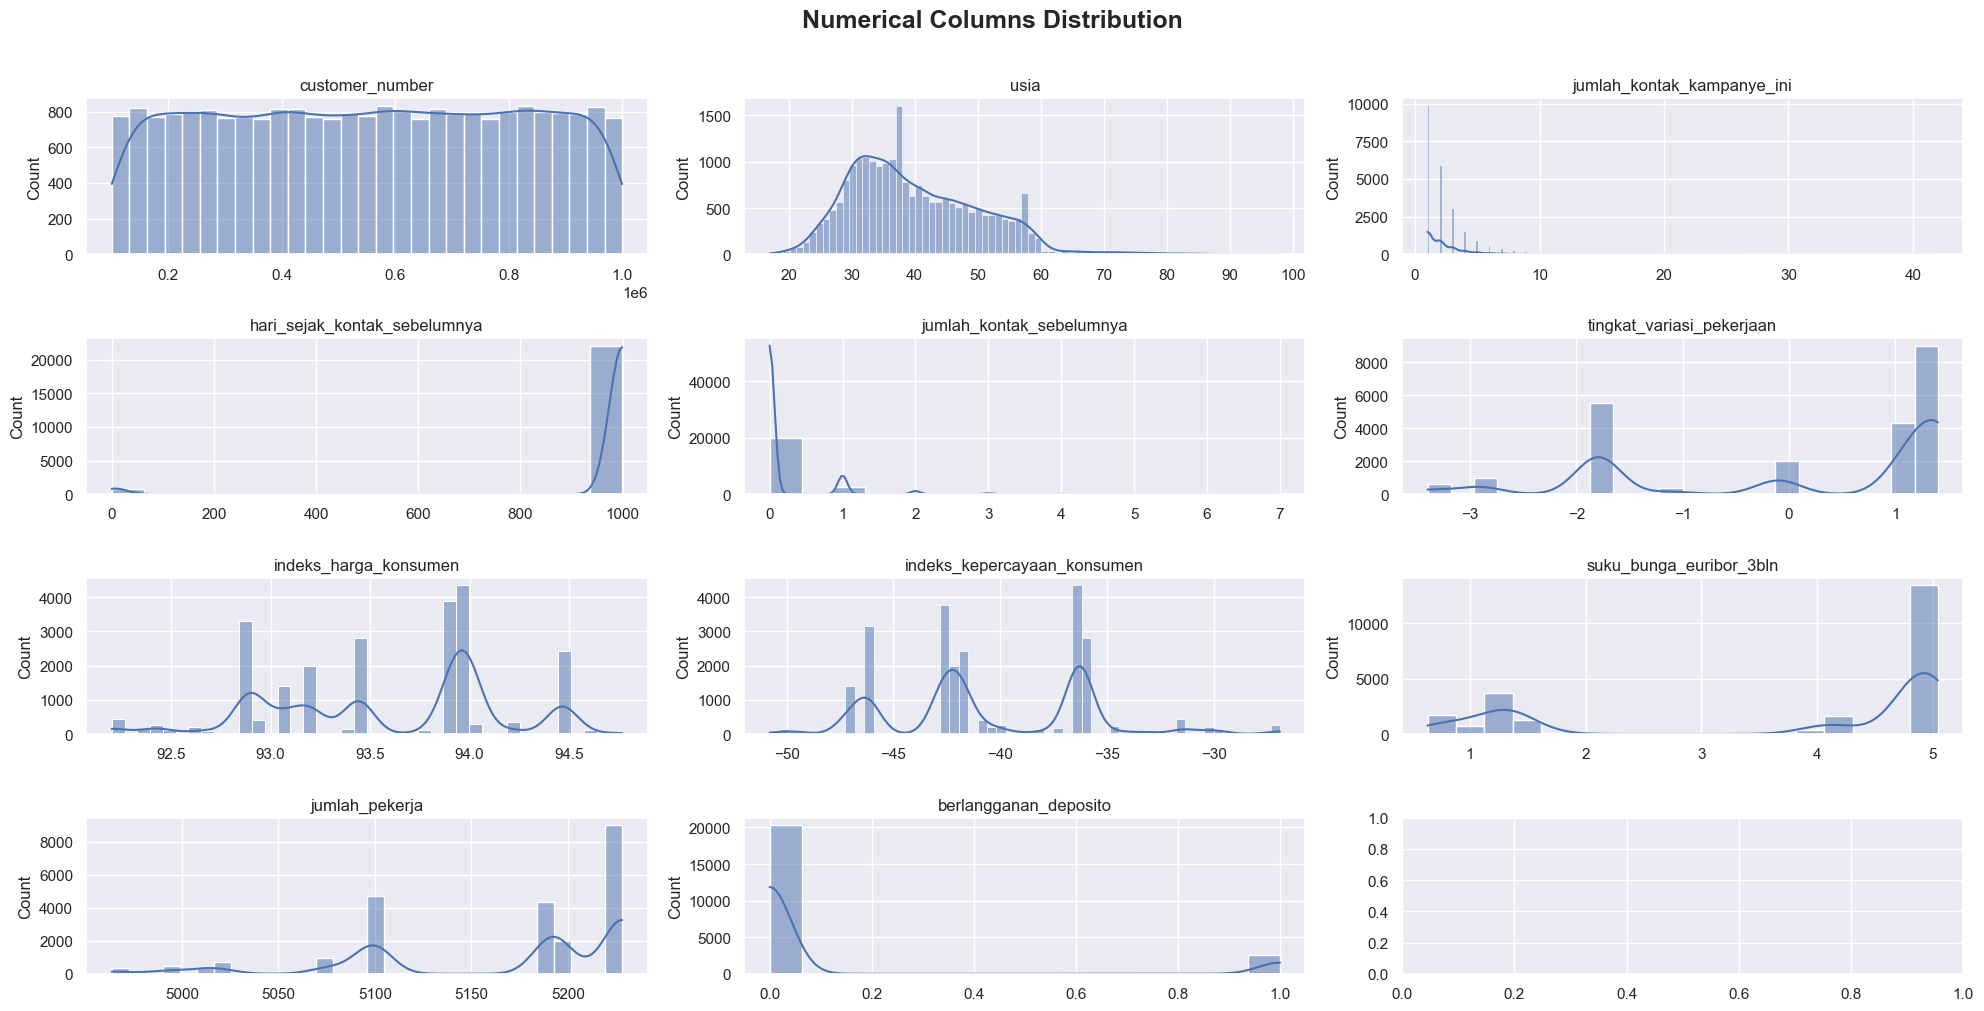

In [29]:
plot_multi_histogram(df_train, num_columns)

#### **4.4.2. Deteksi Outlier (Box Plot)**


In [ ]:
for column in num_columns:
    fig = px.histogram(
        df_train[column],
        x=column,
        title=f"Box Plot {column}",
        marginal="box",
    )

    fig.show()

#### **4.4.3. Korelasi antar Fitur Numerik (Heatmap Korelasi)**


Melihat korelasi Pearson antar fitur numerik dan juga dengan variabel target (jika numerik, dalam kasus ini target sudah 0/1 jadi bisa dimasukkan). Ini membantu mengidentifikasi multikolinearitas dan fitur yang mungkin memiliki hubungan linear kuat dengan target.


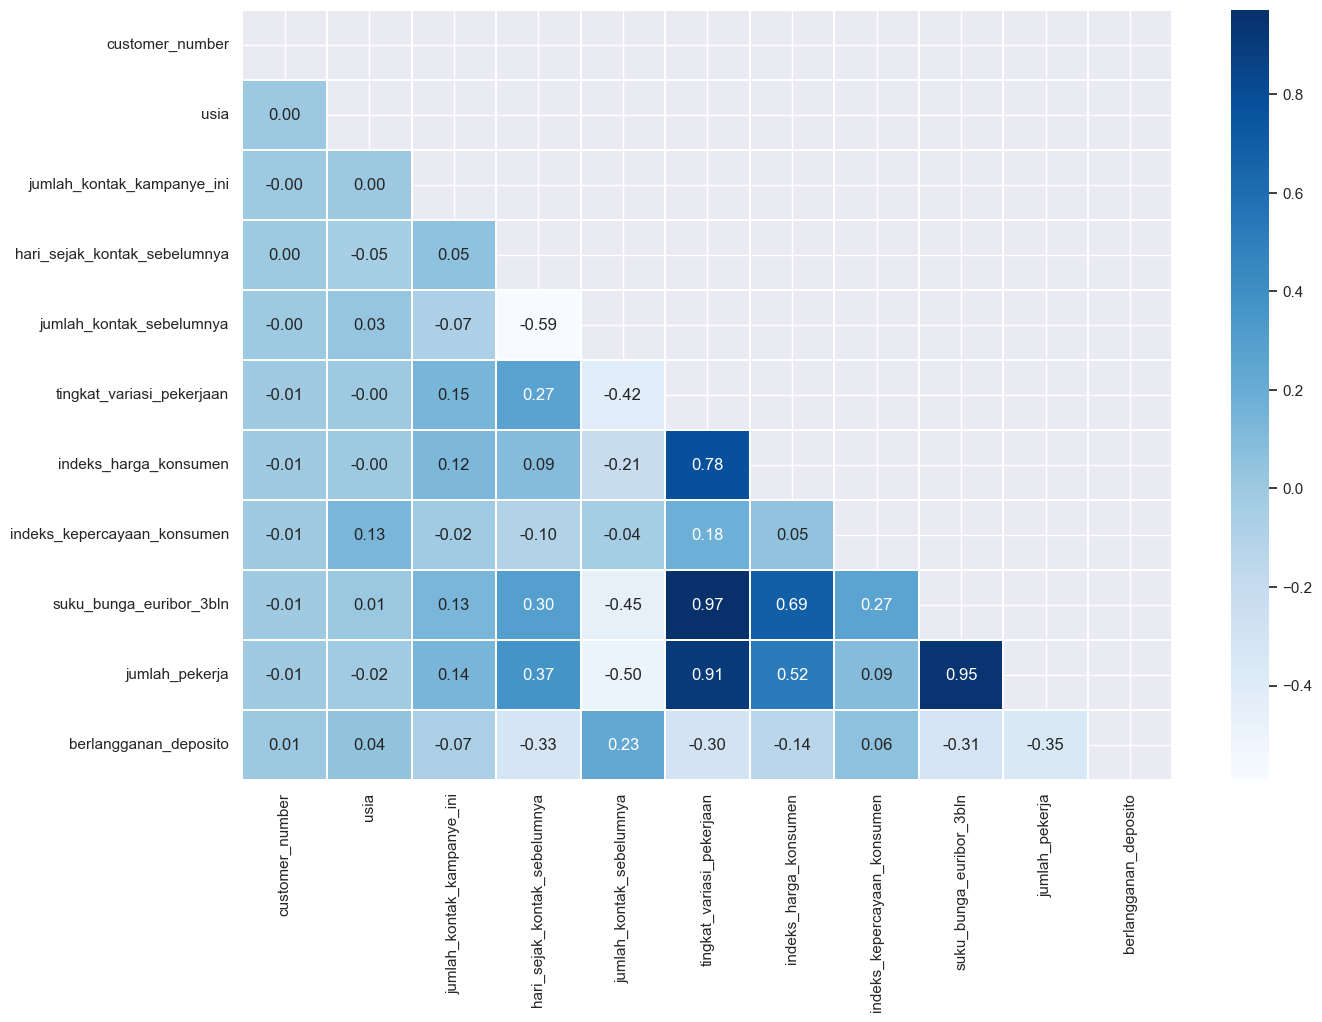

In [33]:
plot_correlation_matrix(
    df_train,
    num_columns,
)

### **4.5. Analisis Fitur Kategorikal**


#### **4.5.1. Distribusi Masing-masing Fitur Kategorikal (Bar Plot Frekuensi)**


In [ ]:
for column in cat_columns:
    fig = px.histogram(
        df_train,
        x=column,
        histnorm="percent",
        text_auto=".2f",
        title=f"Distribusi {column} dalam %",
        category_orders={column: df_train[column].value_counts().index.tolist()},
    )

    fig.update_layout(bargap=0.3)
    fig.show()

#### **4.5.2. Hubungan Fitur Kategorikal dengan Variabel Target (Stacked Bar Plot, Grouped Bar Plot)**


Menganalisis bagaimana distribusi variabel target berubah untuk setiap kategori dalam fitur-fitur kategorikal. Ini dapat memberikan *insight* awal mengenai fitur mana yang mungkin prediktif.


In [ ]:
for column in cat_columns:
    fig = px.histogram(
        df_train,
        x=column,
        color="berlangganan_deposito",
        text_auto=True,
        barmode="group",
        title=f"Jumlah Nasabah Berlangganan atau Tidak Berdasarkan {' '.join(column.split('_')).capitalize()}",
    )

    fig.update_layout(
        legend=dict(
            orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=None
        ),
        # xaxis_title="Model",
        # yaxis_title=None,
    )

    fig.show()

### **4.6. Analisis Missing Values**


#### **4.6.1. Identifikasi Jumlah & Persentase Missing Values per Kolom**


In [36]:
df_train.isna().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64

### **4.7. Analisis Duplikasi Data**


In [37]:
df_train.duplicated().sum()

0

## **5. Pra-pemrosesan Data (Data Preprocessing)**


Setelah melakukan eksplorasi data awal dan memahami karakteristik dataset, tahap selanjutnya adalah pra-pemrosesan data. Tujuan dari pra-pemrosesan adalah untuk membersihkan data dari isu-isu seperti data duplikat dan *missing values*, menangani *outlier*, serta mentransformasi fitur-fitur ke dalam format yang lebih sesuai untuk algoritma *machine learning*. Proses ini sangat krusial untuk meningkatkan kualitas data dan, pada akhirnya, performa model prediktif.


### **5.1. Select Data**

In [38]:
df_train.drop(["customer_number", "hari_sejak_kontak_sebelumnya"], axis=1, inplace=True)

### **5.2. Encoding Fitur Kategorikal**


Algoritma *machine learning* umumnya memerlukan input numerik. Oleh karena itu, fitur-fitur kategorikal perlu diubah menjadi representasi numerik melalui proses *encoding*.

#### **5.2.1. Identifikasi Fitur Kategorikal Nominal vs. Ordinal**


Berdasarkan pemahaman data dan EDA, kita perlu membedakan mana fitur kategorikal yang bersifat nominal (tidak ada urutan intrinsik, misal `pekerjaan`) dan mana yang ordinal (ada urutan, misal `pendidikan` jika diurutkan dari SD ke S3). Untuk lomba ini, jika tidak ada informasi eksplisit tentang ordinalitas, kita bisa asumsikan semua kategorikal adalah nominal atau menggunakan OrdinalEncoder dengan urutan yang didefinisikan secara manual jika diketahui.

*Contoh penentuan (perlu disesuaikan berdasarkan data Anda):*
*   *Fitur Ordinal Potensial: `pendidikan`, `hari_kontak_terakhir`, `bulan_kontak_terakhir` (jika urutannya jelas)*
*   *Fitur Nominal: `pekerjaan`, `status_perkawinan`, `jenis_kontak`, `hasil_kampanye_sebelumnya`, `pulau`.*

In [39]:
nom_features = [
    "pekerjaan",
    "status_perkawinan",
    "jenis_kontak",
    "pulau",
]

In [40]:
df_train = pd.get_dummies(df_train, columns=nom_features, dtype=int)

In [41]:
ord_featuers = df_train.select_dtypes(include=["object"]).columns
ord_featuers

Index(['pendidikan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'bulan_kontak_terakhir', 'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya'], dtype='object')

In [42]:
df_train[ord_featuers].head()

,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,bulan_kontak_terakhir,hari_kontak_terakhir,hasil_kampanye_sebelumnya
0,Pendidikan Tinggi,no,yes,no,jul,fri,nonexistent
1,Pendidikan Tinggi,no,yes,no,nov,fri,nonexistent
2,Pendidikan Tinggi,no,yes,yes,jul,thu,nonexistent
3,SMA,no,no,no,may,wed,nonexistent
4,Pendidikan Tinggi,no,no,no,aug,wed,nonexistent


In [43]:
pendidikan_map = {
    "Pendidikan Tinggi": 6,
    "Diploma": 5,
    "SMA": 4,
    "SMP": 3,
    "SD": 2,
    "Tidak Tamat SD": 1,
    "TIDAK SEKOLAH": 0,
    "unknown": 0,
}

df_train["pendidikan"] = df_train["pendidikan"].map(pendidikan_map)

In [44]:
boolean_map = {"yes": -1, "no": 1, "unknown": 0}

bool_features = ["gagal_bayar_sebelumnya", "pinjaman_rumah", "pinjaman_pribadi"]

for colum in bool_features:
    df_train[colum] = df_train[colum].map(boolean_map)

In [45]:
bulan_map = {
    "jul": 7,
    "nov": 11,
    "may": 5,
    "aug": 8,
    "oct": 10,
    "apr": 4,
    "jun": 6,
    "sep": 9,
    "mar": 5,
    "dec": 12,
}

df_train["bulan_kontak_terakhir"] = df_train["bulan_kontak_terakhir"].map(bulan_map)

In [46]:
hari_map = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}

df_train["hari_kontak_terakhir"] = df_train["hari_kontak_terakhir"].map(hari_map)

In [47]:
kampanye_map = {"success": 1, "failure": -1, "nonexistent": 0}

df_train["hasil_kampanye_sebelumnya"] = df_train["hasil_kampanye_sebelumnya"].map(
    kampanye_map
)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   usia                              22916 non-null  int64  
 1   pendidikan                        22916 non-null  int64  
 2   gagal_bayar_sebelumnya            22916 non-null  int64  
 3   pinjaman_rumah                    22916 non-null  int64  
 4   pinjaman_pribadi                  22916 non-null  int64  
 5   bulan_kontak_terakhir             22916 non-null  int64  
 6   hari_kontak_terakhir              22916 non-null  int64  
 7   jumlah_kontak_kampanye_ini        22916 non-null  int64  
 8   jumlah_kontak_sebelumnya          22916 non-null  int64  
 9   hasil_kampanye_sebelumnya         22916 non-null  int64  
 10  tingkat_variasi_pekerjaan         22916 non-null  float64
 11  indeks_harga_konsumen             22916 non-null  float64
 12  inde

In [49]:
df_train.duplicated().sum()

78

In [50]:
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [51]:
df_train.duplicated().sum()

0

### **5.3. Data Splitting**

In [52]:
X = df_train.drop("berlangganan_deposito", axis=1)
y = df_train["berlangganan_deposito"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=RANDOM_STATE, stratify=y
)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20554, 41), (2284, 41), (20554,), (2284,))

In [55]:
num_features = [
    "usia",
    "jumlah_kontak_kampanye_ini",
    "jumlah_kontak_sebelumnya",
    "tingkat_variasi_pekerjaan",
    "indeks_harga_konsumen",
    "indeks_kepercayaan_konsumen",
    "suku_bunga_euribor_3bln",
    "jumlah_pekerja",
]

### **5.4. Transformasi Fitur Numerik**


Beberapa algoritma *machine learning* (seperti Regresi Logistik, SVM, KNN, Neural Networks) sensitif terhadap skala fitur numerik. Oleh karena itu, *scaling* atau normalisasi seringkali diperlukan. Model berbasis pohon (Decision Tree, Random Forest, Gradient Boosting) umumnya tidak terlalu terpengaruh oleh skala fitur.


#### **5.4.1. Scaling/Normalisasi (StandardScaler, MinMaxScaler)**


*   **StandardScaler**: Mentransformasi data sehingga memiliki mean 0 dan standar deviasi 1.
*   **MinMaxScaler**: Menskalakan data ke rentang tertentu, biasanya [0, 1].
*   **RobustScaler**: Mirip StandardScaler, tetapi menggunakan median dan IQR, sehingga lebih robust terhadap *outlier*.


Kita akan menggunakan StandardScaler. Parameter scaler (mean dan std) dihitung **hanya** dari `X_train`.


In [56]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
scaler.fit(X_train_scaled[num_features])
X_train_scaled[num_features] = scaler.transform(X_train_scaled[num_features])

X_test_scaled = X_test.copy()
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

In [57]:
scaler_2 = StandardScaler()

X_scaled = X.copy()
X_scaled[num_features] = scaler_2.fit_transform(X[num_features])

## **6. Rekayasa Fitur (Feature Engineering)**

### **6.1. Seleksi Fitur (Feature Selection)**


Setelah membuat fitur baru, atau bahkan dengan fitur asli, mungkin tidak semua fitur bermanfaat untuk model. Seleksi fitur membantu memilih subset fitur yang paling relevan.


#### **6.1.1. Metode Filter (Korelasi, Chi-squared, ANOVA F-value)**


Metode filter mengevaluasi relevansi fitur berdasarkan statistik intrinsik data, independen dari model.
*   **Korelasi**: Untuk fitur numerik, kita bisa membuang fitur yang sangat berkorelasi tinggi satu sama lain (multikolinearitas).
*   **Chi-squared / ANOVA**: Untuk mengevaluasi hubungan antara fitur (kategorikal/numerik) dengan target.


#### **6.1.2. Metode Wrapper (Recursive Feature Elimination - RFE)**


Metode *wrapper* menggunakan model prediktif untuk mengevaluasi dan memilih subset fitur. RFE secara rekursif menghilangkan fitur yang paling tidak penting.


In [57]:
clf = GradientBoostingClassifier(random_state=RANDOM_STATE)

recursive_fe = RFECV(estimator=clf, cv=5, scoring="roc_auc").fit(
    X_train_scaled, y_train
)

print(f"optimal number of features selected : {recursive_fe.n_features_}")
print(f"number of features in : {recursive_fe.n_features_in_}")
print(f"the feature ranking : {recursive_fe.ranking_}")
print(f"boolean mask of selected features : {recursive_fe.support_}")
print(f"selected features name : {recursive_fe.get_feature_names_out()}")

optimal number of features selected : 10
number of features in : 41
the feature ranking : [ 1  4 16 22 14  1  1  1  3  1  8  1  1  1  1 23 13  7 20  9 15 32 26 11
 18 24 25 31 19 21 28  1  2 10  6 29 17  5 12 30 27]
boolean mask of selected features : [ True False False False False  True  True  True False  True False  True
  True  True  True False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False]
selected features name : ['usia' 'bulan_kontak_terakhir' 'hari_kontak_terakhir'
 'jumlah_kontak_kampanye_ini' 'hasil_kampanye_sebelumnya'
 'indeks_harga_konsumen' 'indeks_kepercayaan_konsumen'
 'suku_bunga_euribor_3bln' 'jumlah_pekerja' 'jenis_kontak_cellular']


In [58]:
selected_features = [
    "usia",
    "bulan_kontak_terakhir",
    "hari_kontak_terakhir",
    "jumlah_kontak_kampanye_ini",
    "hasil_kampanye_sebelumnya",
    "indeks_harga_konsumen",
    "indeks_kepercayaan_konsumen",
    "suku_bunga_euribor_3bln",
    "jumlah_pekerja",
    "jenis_kontak_cellular",
]

### **6.2. Resampling**

#### **6.2.1. Undersampling**

In [59]:
undersampler = TomekLinks()

X_train_und, y_train_und = undersampler.fit_resample(X_train_scaled, y_train)

In [60]:
y_train.value_counts()

berlangganan_deposito
0    18202
1     2352
Name: count, dtype: int64

In [60]:
y_train_und.value_counts()

berlangganan_deposito
0    17434
1     2352
Name: count, dtype: int64

In [61]:
undersampler_2 = TomekLinks()

X_und, y_und = undersampler.fit_resample(X_scaled, y)

In [62]:
y.value_counts()

berlangganan_deposito
0    20225
1     2613
Name: count, dtype: int64

In [63]:
y_und.value_counts()

berlangganan_deposito
0    19382
1     2613
Name: count, dtype: int64

In [62]:
undersampler_fs = TomekLinks()
X_und_fs, y_und_fs = undersampler_fs.fit_resample(X_scaled[selected_features], y)

In [82]:
y.value_counts()

berlangganan_deposito
0    20225
1     2613
Name: count, dtype: int64

In [83]:
y_und.value_counts()

berlangganan_deposito
0    19382
1     2613
Name: count, dtype: int64

In [81]:
y_und_fs.value_counts()

berlangganan_deposito
0    19728
1     2613
Name: count, dtype: int64

## **7. Pemodelan (Modeling)**


Setelah melalui tahap eksplorasi data, pra-pemrosesan, dan rekayasa fitur, kini kita memiliki dataset (`X_train_processed`, `y_train`, dan `X_val_processed`) yang siap untuk digunakan dalam proses pemodelan. Tujuan utama dari tahap ini adalah untuk melatih berbagai algoritma klasifikasi, mengevaluasi performa mereka secara objektif menggunakan validasi silang (cross-validation) dengan metrik AUC, dan akhirnya memilih beberapa model kandidat terbaik untuk penyetelan hiperparameter lebih lanjut.


### **7.1. Pemilihan Model Baseline & Eksperimen Awal**


Kita akan melatih beberapa model klasifikasi standar sebagai *baseline*. Tujuannya adalah untuk mendapatkan gambaran performa awal dari berbagai jenis algoritma dengan parameter *default* atau parameter sederhana. Evaluasi akan dilakukan menggunakan *cross-validation* pada `X_train_final` dan `y_train_final`.


Metrik evaluasi utama adalah **AUC (Area Under the ROC Curve)**.

In [63]:
models = {
    # "LinearSVC": LinearSVC(random_state=RANDOM_STATE),
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Extra Tree": ExtraTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "LightGBM": LGBMClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=RANDOM_STATE),
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
}

### **7.2. Evaluasi Model Awal Menggunakan Cross-Validation (AUC)**


Validasi silang (cross-validation) adalah teknik penting untuk mendapatkan estimasi performa model yang lebih robust dan mengurangi varians dibandingkan dengan pembagian train-test tunggal. Kita akan menggunakan *Stratified K-Fold Cross-Validation* untuk memastikan proporsi kelas target terjaga di setiap *fold*, yang penting untuk data yang tidak seimbang.


#### **7.2.1. Perbandingan Performa Model Baseline**


Sekarang kita jalankan *cross-validation* untuk semua model *baseline* yang telah diinisialisasi.


In [65]:
result = train_and_evaluate_models_cv(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    models,
    n_splits=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
)

result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1881, number of negative: 14562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 16443, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114395 -> initscore=-2.046612
[LightGBM] [Info] Start training from score -2.046612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1881, number of negative: 14562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

,Model,Avg Score,Std Score,Training Time CV (s),Test AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Training Time Fit (s)
6,Gradient Boosting,0.797,0.011,15.302,0.776,0.898,0.880,0.898,0.876,3.721
7,Hist Gradient Boosting,0.794,0.010,2.456,0.781,0.897,0.878,0.897,0.877,0.554
4,LightGBM,0.791,0.008,1.180,0.777,0.898,0.879,0.898,0.880,0.223
8,AdaBoost,0.789,0.008,5.007,0.775,0.898,0.878,0.898,0.874,1.172
0,Logistic Regression,0.783,0.007,1.790,0.766,0.898,0.881,0.898,0.873,0.359
3,Random Forest,0.775,0.007,10.527,0.785,0.897,0.878,0.897,0.880,2.412
5,XGBoost,0.770,0.008,2.031,0.757,0.895,0.877,0.895,0.881,0.750
1,Decision Tree,0.614,0.011,1.316,0.638,0.844,0.851,0.844,0.847,0.199
2,Extra Tree,0.608,0.011,0.329,0.597,0.833,0.836,0.833,0.834,0.066


In [66]:
result_und = train_and_evaluate_models_cv(
    X_train_und,
    X_test_scaled,
    y_train_und,
    y_test,
    models,
    n_splits=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
)

result_und

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1881, number of negative: 13947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 15828, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118840 -> initscore=-2.003461
[LightGBM] [Info] Start training from score -2.003461
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1881, number of negative: 13948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 15829, number of used fea

,Model,Avg Score,Std Score,Training Time CV (s),Test AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Training Time Fit (s)
7,Hist Gradient Boosting,0.810,0.009,2.429,0.783,0.895,0.876,0.895,0.880,0.557
6,Gradient Boosting,0.805,0.011,17.679,0.777,0.895,0.876,0.895,0.878,3.572
4,LightGBM,0.803,0.010,2.349,0.769,0.897,0.881,0.897,0.884,0.463
8,AdaBoost,0.798,0.009,5.428,0.774,0.898,0.880,0.898,0.878,1.161
3,Random Forest,0.796,0.006,13.643,0.768,0.893,0.876,0.893,0.880,4.043
0,Logistic Regression,0.791,0.007,1.767,0.768,0.901,0.885,0.901,0.883,0.284
5,XGBoost,0.783,0.008,4.422,0.752,0.888,0.869,0.888,0.875,0.645
1,Decision Tree,0.636,0.012,1.344,0.630,0.831,0.846,0.831,0.838,0.212
2,Extra Tree,0.631,0.014,0.212,0.619,0.831,0.843,0.831,0.836,0.035


In [69]:
result_fs = train_and_evaluate_models_cv(
    X_train_scaled[selected_features],
    X_test_scaled[selected_features],
    y_train,
    y_test,
    models,
    n_splits=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
)

result_fs

[LightGBM] [Info] Number of positive: 1881, number of negative: 14562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 16443, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114395 -> initscore=-2.046612
[LightGBM] [Info] Start training from score -2.046612
[LightGBM] [Info] Number of positive: 1881, number of negative: 14562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 16443, number of used features: 10
[LightGBM] [Info] [bin

,Model,Avg Score,Std Score,Training Time CV (s),Test AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Training Time Fit (s)
6,Gradient Boosting,0.800,0.010,10.011,0.778,0.898,0.880,0.898,0.877,1.745
7,Hist Gradient Boosting,0.796,0.013,1.605,0.780,0.899,0.881,0.899,0.880,0.409
4,LightGBM,0.793,0.010,0.853,0.773,0.898,0.880,0.898,0.882,0.159
8,AdaBoost,0.793,0.010,2.916,0.776,0.899,0.883,0.899,0.874,0.825
0,Logistic Regression,0.778,0.005,0.601,0.759,0.900,0.883,0.900,0.877,0.139
5,XGBoost,0.778,0.008,1.169,0.762,0.891,0.870,0.891,0.874,0.246
3,Random Forest,0.746,0.011,9.405,0.754,0.882,0.866,0.882,0.872,1.877
1,Decision Tree,0.623,0.004,0.368,0.652,0.863,0.857,0.863,0.860,0.091
2,Extra Tree,0.622,0.011,0.181,0.639,0.872,0.860,0.872,0.865,0.029


In [70]:
result_fs_und = train_and_evaluate_models_cv(
    X_train_und[selected_features],
    X_test_scaled[selected_features],
    y_train_und,
    y_test,
    models,
    n_splits=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
)

result_fs_und

[LightGBM] [Info] Number of positive: 1881, number of negative: 13947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 15828, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118840 -> initscore=-2.003461
[LightGBM] [Info] Start training from score -2.003461
[LightGBM] [Info] Number of positive: 1881, number of negative: 13948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 15829, number of used features: 10
[LightGBM] [Info] [bin

,Model,Avg Score,Std Score,Training Time CV (s),Test AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Training Time Fit (s)
7,Hist Gradient Boosting,0.808,0.011,1.857,0.777,0.898,0.881,0.898,0.884,0.456
6,Gradient Boosting,0.807,0.011,8.747,0.779,0.897,0.878,0.897,0.880,1.823
4,LightGBM,0.801,0.010,1.140,0.778,0.894,0.877,0.894,0.882,0.208
8,AdaBoost,0.801,0.012,3.010,0.777,0.897,0.877,0.897,0.877,0.789
5,XGBoost,0.788,0.013,1.485,0.768,0.891,0.873,0.891,0.878,0.262
0,Logistic Regression,0.787,0.006,0.893,0.759,0.898,0.879,0.898,0.880,0.098
3,Random Forest,0.761,0.010,11.052,0.760,0.885,0.876,0.885,0.880,2.308
1,Decision Tree,0.648,0.011,0.441,0.647,0.859,0.855,0.859,0.857,0.103
2,Extra Tree,0.647,0.016,0.197,0.657,0.867,0.862,0.867,0.864,0.024


In [78]:
import time

n_splits = 5
scoring = "roc_auc"
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)


def evaluate_cv(X, y, models, cv=5, scoring="roc_auc"):
    evaluation_results = []

    for model_name, model in models.items():
        start_time = time.time()
        score = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        training_time_cv = time.time() - start_time

        avg_score = score.mean()
        std_score = score.std()

        # Store results
        evaluation_results.append(
            {
                "Model": model_name,
                "Avg Score": avg_score,
                "Std Score": std_score,
                "Training Time CV (s)": training_time_cv,
            }
        )

    result_df = pd.DataFrame(evaluation_results)

    return result_df.sort_values(by="Avg Score", ascending=False)

In [72]:
result_all_data = evaluate_cv(X_scaled, y, models, cv=skf, scoring="roc_auc")
result_all_data

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2090, number of negative: 16180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 18270, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114395 -> initscore=-2.046612
[LightGBM] [Info] Start training from score -2.046612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2090, number of negative: 16180
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] N

,Model,Avg Score,Std Score,Training Time CV (s)
6,Gradient Boosting,0.796,0.010,14.768
7,Hist Gradient Boosting,0.795,0.012,2.057
4,LightGBM,0.792,0.011,1.183
8,AdaBoost,0.790,0.009,4.981
0,Logistic Regression,0.780,0.010,2.482
3,Random Forest,0.777,0.007,11.482
5,XGBoost,0.767,0.007,1.973
1,Decision Tree,0.616,0.006,1.073
2,Extra Tree,0.612,0.013,0.344


In [73]:
result_all_data_und = evaluate_cv(X_und, y_und, models, cv=skf, scoring="roc_auc")
result_all_data_und

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2090, number of negative: 15506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 17596, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118777 -> initscore=-2.004063
[LightGBM] [Info] Start training from score -2.004063
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2090, number of negative: 15506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

,Model,Avg Score,Std Score,Training Time CV (s)
6,Gradient Boosting,0.804,0.006,14.752
7,Hist Gradient Boosting,0.803,0.008,2.161
4,LightGBM,0.802,0.009,1.138
3,Random Forest,0.798,0.007,11.859
8,AdaBoost,0.797,0.006,5.093
0,Logistic Regression,0.789,0.009,1.739
5,XGBoost,0.780,0.011,2.495
1,Decision Tree,0.642,0.007,1.060
2,Extra Tree,0.637,0.005,0.261


### **7.3. Pemilihan Model Kandidat Terbaik (berdasarkan hasil evaluasi awal)**


Berdasarkan hasil *cross-validation* di atas (terutama skor rata-rata AUC dan stabilitasnya/standar deviasi), kita akan memilih beberapa model (misalnya, 2-3 model) yang menunjukkan performa paling menjanjikan. Model-model inilah yang akan menjadi kandidat untuk tahap penyetelan hiperparameter (*hyperparameter tuning*). Pertimbangkan juga waktu training jika itu menjadi kendala.

Model-model ini akan kita bawa ke tahap selanjutnya.

## **8. Penyetelan Hiperparameter (Hyperparameter Tuning)**


Setelah mengidentifikasi model-model kandidat dengan performa *baseline* yang menjanjikan, tahap berikutnya adalah penyetelan hiperparameter. Hiperparameter adalah parameter eksternal dari model yang nilainya tidak dipelajari dari data secara langsung, melainkan harus ditetapkan sebelum proses training. Penyetelan yang tepat dapat meningkatkan performa model secara signifikan.

Kita akan fokus pada model-model yang terpilih dari evaluasi *cross-validation* sebelumnya. Untuk setiap model, kita akan mendefinisikan ruang pencarian hiperparameter (*parameter grid*) dan menggunakan teknik pencarian sistematis untuk menemukan kombinasi terbaik.

### **8.1. Penyetelan Hiperparameter untuk Model 1: Hist Gradient Boosting Classifier**


Berdasarkan hasil *baseline*, Hist Gradient Boosting menunjukkan performa yang sangat baik. Mari kita coba optimalkan hiperparameternya.


In [73]:
space = {
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
    "max_iter": hp.quniform("max_iter", 100, 1000, 50),
    "max_leaf_nodes": hp.quniform("max_leaf_nodes", 10, 100, 5),
    "max_depth": hp.choice("max_depth", [None, 3, 5, 7, 10]),
    "l2_regularization": hp.loguniform("l2_regularization", np.log(1e-4), np.log(1.0)),
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


def objective(params):
    params["max_iter"] = int(params["max_iter"])
    params["max_leaf_nodes"] = int(params["max_leaf_nodes"])

    model = HistGradientBoostingClassifier(**params, random_state=42)

    # Gunakan skor AUC rata-rata sebagai metric
    score = cross_val_score(
        model, X_train_und, y_train_und, cv=skf, scoring="roc_auc"
    ).mean()

    return {"loss": -score, "status": STATUS_OK}


trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(RANDOM_STATE),
)

best["max_iter"] = int(best["max_iter"])
best["max_leaf_nodes"] = int(best["max_leaf_nodes"])
best["max_depth"] = [None, 3, 5, 7, 10][best["max_depth"]]

best


100%|██████████| 50/50 [03:20<00:00,  4.01s/trial, best loss: -0.8106916558570371]


{'l2_regularization': np.float64(0.0007146954337823273),
 'learning_rate': np.float64(0.0733714367396384),
 'max_depth': None,
 'max_iter': 600,
 'max_leaf_nodes': 15}

In [70]:
best = {
    "l2_regularization": 0.0007146954337823273,
    "learning_rate": 0.0733714367396384,
    "max_depth": None,
    "max_iter": 800,
    "max_leaf_nodes": 15,
}

In [71]:
tuned_models = {
    "Hist Gradient Boosting (Tuned 1)": HistGradientBoostingClassifier(
        **best, random_state=RANDOM_STATE
    ),
}

In [76]:
train_and_evaluate_models_cv(
    X_train_und[selected_features],
    X_test_scaled[selected_features],
    y_train_und,
    y_test,
    tuned_models,
)

,Model,Avg Score,Std Score,Training Time CV (s),Test AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Training Time Fit (s)
0,Hist Gradient Boosting (Tuned 1),0.899,0.004,1.257,0.782,0.897,0.879,0.897,0.881,0.172


In [ ]:
space = {
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
    "max_iter": hp.quniform("max_iter", 100, 1000, 50),
    "max_leaf_nodes": hp.quniform("max_leaf_nodes", 10, 100, 5),
    "max_depth": hp.choice("max_depth", [None, 3, 5, 7, 10]),
    "l2_regularization": hp.loguniform("l2_regularization", np.log(1e-4), np.log(1.0)),
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


def objective(params):
    params["max_iter"] = int(params["max_iter"])
    params["max_leaf_nodes"] = int(params["max_leaf_nodes"])

    model = HistGradientBoostingClassifier(**params, random_state=42)

    # Gunakan skor AUC rata-rata sebagai metric
    score = cross_val_score(model, X_und, y_und, cv=skf, scoring="roc_auc").mean()

    return {"loss": -score, "status": STATUS_OK}


trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(RANDOM_STATE),
)

best["max_iter"] = int(best["max_iter"])
best["max_leaf_nodes"] = int(best["max_leaf_nodes"])
best["max_depth"] = [None, 3, 5, 7, 10][best["max_depth"]]

best

In [72]:
best_2 = {
    "l2_regularization": np.float64(0.0057280871105010005),
    "learning_rate": np.float64(0.01711360328147873),
    "max_depth": None,
    "max_iter": 950,
    "max_leaf_nodes": 20,
}

In [73]:
tuned_models["Hist Gradient Boosting (Tuned 2)"] = HistGradientBoostingClassifier(
    **best_2, random_state=RANDOM_STATE
)

In [78]:
tuned_models

{'Hist Gradient Boosting (Tuned 1)': HistGradientBoostingClassifier(l2_regularization=0.0007146954337823273,
                                learning_rate=0.0733714367396384, max_iter=800,
                                max_leaf_nodes=15, random_state=42),
 'Hist Gradient Boosting (Tuned 2)': HistGradientBoostingClassifier(l2_regularization=0.0057280871105010005,
                                learning_rate=0.01711360328147873, max_iter=950,
                                max_leaf_nodes=20, random_state=42)}

In [85]:
space = {
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
    "max_iter": hp.quniform("max_iter", 100, 1000, 50),
    "max_leaf_nodes": hp.quniform("max_leaf_nodes", 10, 100, 5),
    "max_depth": hp.choice("max_depth", [None, 3, 5, 7, 10]),
    "l2_regularization": hp.loguniform("l2_regularization", np.log(1e-4), np.log(1.0)),
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


def objective(params):
    params["max_iter"] = int(params["max_iter"])
    params["max_leaf_nodes"] = int(params["max_leaf_nodes"])

    model = HistGradientBoostingClassifier(**params, random_state=42)

    # Gunakan skor AUC rata-rata sebagai metric
    score = cross_val_score(model, X_und_fs, y_und_fs, cv=skf, scoring="roc_auc").mean()

    return {"loss": -score, "status": STATUS_OK}


trials = Trials()

best_3 = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(RANDOM_STATE),
)

best_3["max_iter"] = int(best_3["max_iter"])
best_3["max_leaf_nodes"] = int(best_3["max_leaf_nodes"])
best_3["max_depth"] = [None, 3, 5, 7, 10][best_3["max_depth"]]

best_3

100%|██████████| 50/50 [02:59<00:00,  3.60s/trial, best loss: -0.8088281889384568]


{'l2_regularization': 0.0012638154755574963,
 'learning_rate': 0.3578258689038835,
 'max_depth': 3,
 'max_iter': 650,
 'max_leaf_nodes': 40}

In [75]:
best_3 = {
    "l2_regularization": 0.0012638154755574963,
    "learning_rate": 0.3578258689038835,
    "max_depth": 3,
    "max_iter": 650,
    "max_leaf_nodes": 40,
}

In [76]:
tuned_models["Hist Gradient Boosting (Tuned 3)"] = HistGradientBoostingClassifier(
    **best_3, random_state=RANDOM_STATE
)

In [87]:
evaluate_cv(X_und, y_und, tuned_models, cv=skf, scoring="roc_auc")

,Model,Avg Score,Std Score,Training Time CV (s)
1,Hist Gradient Boosting (Tuned 2),0.807,0.009,9.417
2,Hist Gradient Boosting (Tuned 3),0.806,0.008,0.983
0,Hist Gradient Boosting (Tuned 1),0.805,0.008,3.100


In [79]:
evaluate_cv(X_und_fs, y_und_fs, tuned_models, cv=skf, scoring="roc_auc")

,Model,Avg Score,Std Score,Training Time CV (s)
2,Hist Gradient Boosting (Tuned 3),0.809,0.005,0.671
0,Hist Gradient Boosting (Tuned 1),0.808,0.008,2.416
1,Hist Gradient Boosting (Tuned 2),0.807,0.007,5.910


### **8.2. Penyetelan Hiperparameter untuk Model 1: XGBoost Classifier**


In [ ]:
# Defining the objective function
def objective(trial):
    param = {
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
    }

    # initializing the XGBoost model
    model = xgb.XGBClassifier(
        **param,
        tree_method="hist",  # Using GPU for training
        device="cuda",
    )  # If you have multiple GPUs, you can specify the GPU ID

    # if you try in the computer without GPU, just remove the last 2 params (tree_method & device)

    score = cross_val_score(
        model,
        X_und_fs,
        y_und_fs,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
        scoring="roc_auc",
    ).mean()  # calculating score using cross-validation
    return score

In [ ]:
# Create and run the optimization process with 100 trials
study = optuna.create_study(study_name="example_xgboost_study", direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

# Retrieve the best parameter values
best_params = study.best_params
print(f"\nBest parameters: {best_params}")

In [91]:
best_params

{'max_depth': 3,
 'learning_rate': 0.024548396616239795,
 'n_estimators': 872,
 'subsample': 0.7889760113197031,
 'colsample_bytree': 0.6405378503512776,
 'min_child_weight': 3,
 'gamma': 1.4011292716336397}

In [94]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

In [84]:
tuned_models["XGBoost (Tuned 1)"] = xgb.XGBClassifier(
    **best_params,
    tree_method="hist",  # Using GPU for training
    device="cuda",
    random_state=RANDOM_STATE,
)

In [92]:
best_params_2 = {
    "max_depth": 3,
    "learning_rate": 0.024548396616239795,
    "n_estimators": 872,
    "subsample": 0.7889760113197031,
    "colsample_bytree": 0.6405378503512776,
    "min_child_weight": 3,
    "gamma": 1.4011292716336397,
}

In [93]:
tuned_models["XGBoost (Tuned 2)"] = xgb.XGBClassifier(
    **best_params_2,
    tree_method="hist",  # Using GPU for training
    device="cuda",
    random_state=RANDOM_STATE,
)

In [95]:
tuned_models

{'Hist Gradient Boosting (Tuned 1)': HistGradientBoostingClassifier(l2_regularization=0.0007146954337823273,
                                learning_rate=0.0733714367396384, max_iter=800,
                                max_leaf_nodes=15, random_state=42),
 'Hist Gradient Boosting (Tuned 2)': HistGradientBoostingClassifier(l2_regularization=0.0057280871105010005,
                                learning_rate=0.01711360328147873, max_iter=950,
                                max_leaf_nodes=20, random_state=42),
 'Hist Gradient Boosting (Tuned 3)': HistGradientBoostingClassifier(l2_regularization=0.0012638154755574963,
                                learning_rate=0.3578258689038835, max_depth=3,
                                max_iter=650, max_leaf_nodes=40,
                                random_state=42),
 'XGBoost (Tuned 1)': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6

In [96]:
evaluate_cv(
    X_und_fs,
    y_und_fs,
    tuned_models,
    cv=skf,
    scoring="roc_auc",
)

,Model,Avg Score,Std Score,Training Time CV (s)
4,XGBoost (Tuned 2),0.809,0.007,9.164
3,XGBoost (Tuned 1),0.809,0.007,3.968
2,Hist Gradient Boosting (Tuned 3),0.809,0.005,0.689
0,Hist Gradient Boosting (Tuned 1),0.808,0.008,2.407
1,Hist Gradient Boosting (Tuned 2),0.807,0.007,5.013


## **8.3. Ensemble Model**

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression()),
        ("rf", RandomForestClassifier()),
        ("xgb", XGBClassifier()),
    ],
    voting="soft",  # gunakan soft voting jika semua model bisa output probabilitas
)

voting_tuned_clf = VotingClassifier(
    estimators=[
        ("xgb", tuned_models["XGBoost (Tuned 1)"]),
        ("xgb2", tuned_models["XGBoost (Tuned 2)"]),
    ],
    voting="soft",
)

In [111]:
ensemble_models = {
    "Voting Classifier": voting_clf,
    "Voting Classifier (Tuned)": voting_tuned_clf,
}

In [112]:
evaluate_cv(
    X_und_fs,
    y_und_fs,
    ensemble_models,
    cv=skf,
    scoring="roc_auc",
)

,Model,Avg Score,Std Score,Training Time CV (s)
1,Voting Classifier (Tuned),0.810,0.007,13.392
0,Voting Classifier,0.798,0.004,11.539


## **9. Evaluasi Model Final & Pemilihan Model Terbaik**


Setelah melakukan penyetelan hiperparameter pada model-model kandidat, langkah selanjutnya adalah mengevaluasi performa final dari model-model yang telah dioptimalkan tersebut. Kita juga akan melakukan analisis lebih lanjut seperti pengecekan *overfitting*, interpretasi model, dan akhirnya memilih satu model terbaik yang akan digunakan untuk membuat prediksi pada dataset validasi yang akan disubmit.


### **9.1. Melatih Model Kandidat dengan Parameter Terbaik pada Seluruh Data Training**


Model terbaik dari setiap proses tuning (`best_estimator_` yang disimpan di `best_estimators`) sudah dilatih pada seluruh data training yang digunakan dalam `RandomizedSearchCV` atau `GridSearchCV` (jika `refit=True`, yang merupakan default). Jadi, kita bisa langsung menggunakan objek `best_estimator_` tersebut. Namun, jika ingin memastikan atau jika ada strategi validasi terpisah sebelumnya, kita bisa melatih ulang model dengan parameter terbaik pada seluruh `X_train_final` dan `y_train_final`.

Untuk kesederhanaan dan karena `best_estimator_` sudah dilatih, kita akan langsung menggunakannya.


### 9.1.1. Best Model Submission 1

In [81]:
best_model = tuned_models["Hist Gradient Boosting (Tuned 2)"]
best_model

HistGradientBoostingClassifier(l2_regularization=np.float64(0.0057280871105010005),
                               learning_rate=np.float64(0.01711360328147873),
                               max_iter=950, max_leaf_nodes=20,
                               random_state=42)

In [83]:
# untuk mengecek apakah direktorinya ada. jika tidak maka dibuat
output_dir = "models"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

save_model(best_model, os.path.join(output_dir, "best_model.joblib"))

Created directory: models
Model saved to models/best_model.joblib


In [84]:
is_model_fitted(best_model)

False

In [85]:
trained_best_model, time = train_model(best_model, X_und, y_und)

In [86]:
trained_best_model

HistGradientBoostingClassifier(l2_regularization=np.float64(0.0057280871105010005),
                               learning_rate=np.float64(0.01711360328147873),
                               max_iter=950, max_leaf_nodes=20,
                               random_state=42)

In [87]:
is_model_fitted(trained_best_model)

True

### 9.1.2. Best Model Submission 2

In [114]:
best_model_2 = ensemble_models["Voting Classifier (Tuned)"]
best_model_2

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6005456613346352,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=2.4074510195367713,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.024548396616239795,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=3,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=872, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [115]:
is_model_fitted(best_model_2)

False

In [ ]:
trained_best_model_2, time_2 = train_model(best_model_2, X_und_fs, y_und_fs)
trained_best_model_2

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6005456613346352,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=2.4074510195367713,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.024548396616239795,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=3,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=872, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [122]:
is_model_fitted(trained_best_model_2)

True

In [132]:
# untuk mengecek apakah direktorinya ada. jika tidak maka dibuat
output_dir = "models"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

save_model(trained_best_model_2, os.path.join(output_dir, "best_model_2.joblib"))

Model saved to models\best_model_2.joblib


### **9.2. Prediksi pada Data Validasi (`X_val_final`)**


Setelah mengevaluasi pada data training, kita akan menggunakan model-model yang telah dioptimalkan untuk membuat prediksi probabilitas pada dataset validasi (`X_val_final`). Prediksi ini yang nantinya akan digunakan untuk membuat file submission.


### 9.2.1. Submission 1

In [117]:
X_val = df_val.drop(["customer_number", "hari_sejak_kontak_sebelumnya"], axis=1)

In [118]:
X_val = pd.get_dummies(X_val, columns=nom_features, dtype=int)

In [119]:
X_val["pendidikan"] = X_val["pendidikan"].map(pendidikan_map)

for colum in bool_features:
    X_val[colum] = X_val[colum].map(boolean_map)

X_val["bulan_kontak_terakhir"] = X_val["bulan_kontak_terakhir"].map(bulan_map)
X_val["hari_kontak_terakhir"] = X_val["hari_kontak_terakhir"].map(hari_map)
X_val["hasil_kampanye_sebelumnya"] = X_val["hasil_kampanye_sebelumnya"].map(
    kampanye_map
)

In [120]:
X_val_scaled = X_val.copy()
X_val_scaled[num_features] = scaler_2.transform(df_val[num_features])

In [92]:
y_pred = trained_best_model.predict_proba(X_val_scaled)[:, 1]

In [93]:
submission = pd.DataFrame(
    {"customer_number": df_val["customer_number"], "berlangganan_deposito": y_pred}
)

In [94]:
submission

,customer_number,berlangganan_deposito
0,445420,0.063
1,585604,0.039
2,888824,0.034
3,816820,0.034
4,542716,0.060
...,...,...
5724,782072,0.047
5725,116371,0.034
5726,773759,0.034
5727,612330,0.048


In [ ]:
submission_dir = "submission"

# untuk mengecek apakah direktorinya ada. jika tidak maka dibuat
if not os.path.exists(submission_dir):
    os.makedirs(submission_dir)
    print(f"Directory '{submission_dir}' created.")
else:
    print(f"Directory '{submission_dir}' already exists.")

submission.to_csv(
    os.path.join(submission_dir, "DCM_DMU_2025_Model_CubitAkuDong.csv"), index=False
)

Directory 'submission' created.


### 9.2.2. Submission 2

In [125]:
y_pred_2 = trained_best_model_2.predict_proba(X_val_scaled[selected_features])[:, 1]

In [127]:
submission_2 = pd.DataFrame(
    {"customer_number": df_val["customer_number"], "berlangganan_deposito": y_pred_2}
)

In [128]:
submission_2

,customer_number,berlangganan_deposito
0,445420,0.057
1,585604,0.039
2,888824,0.030
3,816820,0.032
4,542716,0.054
...,...,...
5724,782072,0.044
5725,116371,0.036
5726,773759,0.026
5727,612330,0.037


In [131]:
submission_dir = "submission"

# untuk mengecek apakah direktorinya ada. jika tidak maka dibuat
if not os.path.exists(submission_dir):
    os.makedirs(submission_dir)
    print(f"Directory '{submission_dir}' created.")
else:
    print(f"Directory '{submission_dir}' already exists.")

submission_2.to_csv(
    os.path.join(submission_dir, "DCM_DMU_2025_Model_CubitAkuDong_Submission_2.csv"),
    index=False,
)

Directory 'submission' already exists.
